In [25]:
import pandas as pd
import numpy as np
from math import ceil
import time
import glob,os
import re
import matplotlib.pyplot as plt
import pickle

In [26]:
DesignID=pd.read_csv('OptDesign.csv',sep=',',header=1)            #experiment design codes for adults




DesignID=pd.get_dummies(data=DesignID,columns=['Full Braking Before Impact','Weather','Road Type','Day or Night'])


DesignID=DesignID.drop(columns=['Unnamed: 0'],axis=1)


def scantext():                                                       #text files of VR data
    x=[]
    for path,dirs,files in os.walk('/home/arash/VRdata/Data/'):
        for f in files:
            if f.endswith('.txt'):
                x.append(os.path.join(path,f))
    return(x)



alltext=scantext()
        

In [27]:
googleforms=pd.read_csv('/home/arash/VRdata/Google Forms/PED-AV Questionnaire.csv',sep=',',header=0)

googleforms=pd.get_dummies(data=googleforms,columns=['Age','Gender','Occupation','Education','driving license','mode',
                                                     'workwalk','shopwalk','Vrexp','Heart','vision','anxiety', 'Headaches','dizziness'])

googleforms=googleforms.drop(columns=['Gender_Male','driving license_No','Vrexp_No','numwalk'],axis=1)            #numwalk is not reported in a readible form so i remove it temporarly

googleforms=googleforms.rename(columns={'Age_12-Sep':'Age_9-12',
                            'Age_15-Dec':'Age_12-15'
                           })

In [46]:
googleforms.columns

Index(['name', 'numcars', 'Vrexpnum', 'Age_9-12', 'Age_15-18', 'Age_12-15',
       'Age_18 - 24', 'Age_25 - 29', 'Age_30 - 39', 'Age_40 - 49',
       'Age_50 - 59', 'Age_60+', 'Gender_Female', 'Occupation_Employed',
       'Occupation_Student', 'Occupation_Unemployed', 'Occupation_kid',
       'Education_Bachelors degree', 'Education_College/University student',
       'Education_Doctorate degree', 'Education_High school diploma',
       'Education_Masters degree', 'Education_Professional degree',
       'Education_kid', 'driving license_Yes', 'mode_Bike', 'mode_Car',
       'mode_Public Transit', 'mode_Walking', 'workwalk_No',
       'workwalk_Sometimes', 'workwalk_Yes', 'shopwalk_No',
       'shopwalk_Sometimes', 'shopwalk_Yes', 'shopwalk_kid', 'Vrexp_Yes',
       'Heart_Currently', 'Heart_Over the years', 'vision_Currently',
       'vision_Currently;Over the years', 'vision_Over the years',
       'anxiety_Currently', 'anxiety_Over the years', 'Headaches_Currently',
       'Headache

In [35]:
experiments=[]
for filename in alltext:
    lastslashindex=filename.rfind('/')
    onetolastslashindex=filename[:lastslashindex].rfind('/')
    name=filename[onetolastslashindex+1:lastslashindex]                         #name of the participant
    hyphen=filename[lastslashindex:].find('-')
    desID=int(filename[lastslashindex+1:][:hyphen-1])                             #scenario ID
    df=pd.read_csv(filename,header=None,names=['status','y','height','x',4,5,'o1','o2','o3','timeelaspsed','timehr','timemin','timesec'],sep=':|;|,|\(|\)',engine='python')   #x,y,height: coordinates,     #o1,o2,o3: head orientation
    df=df.drop(columns=[4,5],axis=1)
    

    df['scenario']=desID
    df['name']=name
    df['filename']=filename[24:]
    tindex=(df.index[df['status']=='u ']-1).tolist()
    pindex=(df.index[df['status']=='u ']).tolist()
    df.iloc[pindex,df.columns.get_loc('timeelaspsed')]=df.iloc[tindex,0].values
    df.iloc[pindex,df.columns.get_loc('timehr')]=df.iloc[tindex,1].values
    df.iloc[pindex,df.columns.get_loc('timemin')]=df.iloc[tindex,2].values
    df.iloc[pindex,df.columns.get_loc('timesec')]=df.iloc[tindex,3].values
    df=df.drop(df.index[tindex])
    df=df.reset_index()
    df=df.drop('index',axis=1)
    
    
    
    experiments.append(df)
    
#Row1: u: user, L: car on the bottom lane   R:Car on top lane, NaN: different points of cars     
#columns: y:axis parallel to street, increases in the left side of user, x: axix Perpendicular to street, dicreases when user crosses the road

TypeError: nan is not a string

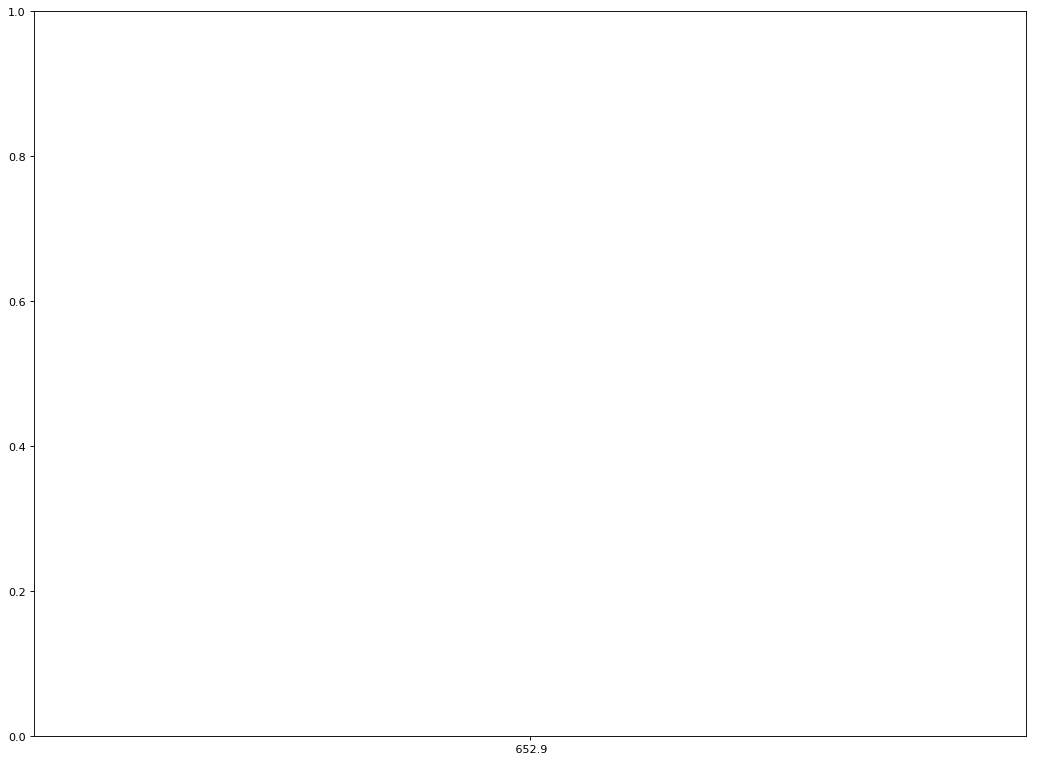

In [29]:
#just to check some waiting times
xaxis=experiments[234]['x']

time=experiments[234]['timeelaspsed']





plt.figure(figsize=(16, 12), dpi=80)

plt.plot(xaxis,time)

In [37]:
ALLDATA.head()

,File,Scenario,Wait Time (s),PET (s),Distace to Collision Point,Card ID,Speed Limit,Lane Width,Minimum Gap,Mean Arrival Rate,...,Heart_Currently,Heart_Over the years,vision_Currently,vision_Currently;Over the years,vision_Over the years,anxiety_Currently,anxiety_Over the years,Headaches_Currently,Headaches_Over the years,dizziness_Over the years
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [47]:
ALLDATA=pd.DataFrame(index=range(len(experiments)),columns=['File','Scenario','Wait Time (s)','PET (s)', 
       'Distace to Collision Point','Card ID', 'Speed Limit', 'Lane Width', 'Minimum Gap',
       'Mean Arrival Rate', 'AV', 'Full Braking Before Impact_-1.0',
       'Full Braking Before Impact_1', 'Full Braking Before Impact_2',
       'Full Braking Before Impact_3', 'Clear', 'Snowy',
       'One way', 'two way',
       'Two way with median', 'Day','Night','name', 'numcars', 'Vrexpnum', 'Age_9-12', 'Age_15-18',
       'Age_12-15', 'Age_18 - 24', 'Age_25 - 29', 'Age_30 - 39', 'Age_40 - 49',
       'Age_50 - 59', 'Age_60+', 'Gender_Female', 'Occupation_Employed',
       'Occupation_Student', 'Occupation_Unemployed', 'Occupation_kid',
       'Education_Bachelors degree', 'Education_College/University student',
       'Education_Doctorate degree', 'Education_High school diploma',
       'Education_Masters degree', 'Education_Professional degree',
       'Education_kid', 'driving license_Yes', 'mode_Bike', 'mode_Car',
       'mode_Public Transit', 'mode_Walking', 'workwalk_No',
       'workwalk_Sometimes', 'workwalk_Yes', 'shopwalk_No',
       'shopwalk_Sometimes', 'shopwalk_Yes', 'shopwalk_kid', 'Vrexp_Yes',
       'Heart_Currently', 'Heart_Over the years', 'vision_Currently',
       'vision_Currently;Over the years', 'vision_Over the years',
       'anxiety_Currently', 'anxiety_Over the years', 'Headaches_Currently',
       'Headaches_Over the years', 'dizziness_Over the years'])

In [48]:
for n in range(len(experiments)):
    if not 1<= experiments[n]['scenario'][0] <87:         #check if the scenario is valid
        ALLDATA.iloc[n,0]=experiments[n]['filename'][0]
        ALLDATA.iloc[n,1]='Err3'
        ALLDATA.iloc[n,2]='Err3'                     #error 3: scenario is not valid
        ALLDATA.iloc[n,3]='Err3'
        ALLDATA.iloc[n,4]='Err3'
        ALLDATA.loc[n,5:22]='Err3'
        ALLDATA.loc[n,22:69]='Err3'
        continue
    
    pindex=(experiments[n].index[experiments[n]['status']=='u ']).tolist()     #indces of pedestrians in the experiment dataset

    for index, item in enumerate(pindex):                                      #adding time to all u, L, R and NaN rows
        if index>1:
            experiments[n].iloc[pindex[index-1]:pindex[index],7]=experiments[n].iloc[pindex[index-1],7]
    experiments[n].iloc[max(pindex):,7]=experiments[n].iloc[max(pindex),7]        


    #wait time calculation
    if len(experiments[n]['status'][experiments[n]['status']=='L0 '])>0:                    #to check if first car appears at all
        firstcarL=experiments[n]['status'][experiments[n]['status']=='L0 '].index[0]    #index of first car on L lane
    else:
        firstcarL=99999999
    if len(experiments[n]['status'][experiments[n]['status']=='R0 '])>0:
        firstcarR=experiments[n]['status'][experiments[n]['status']=='R0 '].index[0]    #index of first car on R lane
    else:
        firstcarR=99999999
    firstcar=min(firstcarL,firstcarR)                                               #index of first car appearing
    if firstcar<99999998:
        firstcarappeartime=float(experiments[n].iloc[firstcar,7])                     #time of first car appearing
        firstcarname=(experiments[n].iloc[firstcar,0])                                #is the fisrt car L0 or R0
        firstcary0=experiments[n].iloc[firstcar,1]                                      #y of first car
            

        if firstcary0>experiments[n].iloc[0,1]:                                 #to determine direction of first car
            if experiments[n][experiments[n]['status']==firstcarname][experiments[n]['y']<experiments[n].iloc[0,1]].shape[0]>0:                   #to check if user has waited for the 1st car to pass
                firstcartime=float(experiments[n].iloc[experiments[n][experiments[n]['status']==firstcarname][experiments[n]['y']<experiments[n].iloc[0,1]].index[0]-1,7])    #time first car passes the pedestrian, users are only allowed to start crossing after first car passed
                firstcarindex=[experiments[n][experiments[n]['status']==firstcarname][experiments[n]['y']<experiments[n].iloc[0,1]].index[0]]
            else:
                firstcartime=99999999
        else:
            if experiments[n][experiments[n]['status']==firstcarname][experiments[n]['y']>experiments[n].iloc[0,1]].shape[0]>0:
                firstcartime=float(experiments[n].iloc[experiments[n][experiments[n]['status']==firstcarname][experiments[n]['y']>experiments[n].iloc[0,1]].index[0]-1,7])
                firstcarindex=[experiments[n][experiments[n]['status']==firstcarname][experiments[n]['y']>experiments[n].iloc[0,1]].index[0]]
            else:
                firstcartime=99999999
                    

 
        if firstcartime<99999998:
            pedafter1st=[i for i in pindex if i >= (firstcarindex[0])-1]                      #indices of pedestrians after 1st car passed
            lastpedbefore1st=[i for i in pindex if i < (firstcarindex[0])-1]
            #lastpedbefore1st=lastpedbefore1st[len(lastpedbefore1st)-1]                       
            if experiments[n].iloc[pedafter1st][pd.to_numeric(experiments[n]['x'])<(float(experiments[n]['x'][0])-0.2)].shape[0]==0:
                ALLDATA.iloc[n,0]=experiments[n]['filename'][0]
                ALLDATA.iloc[n,1]='Err4'
                ALLDATA.iloc[n,2]='Err4'                     #error 4: user does not start crossing
                ALLDATA.iloc[n,3]='Err4'
                ALLDATA.iloc[n,4]='Err4'
                ALLDATA.loc[n,5:22]='Err4' #ALLDATA.loc[n,5:22]=='Err4'#DesignID[DesignID['Card ID']==experiments[n]['scenario'][0]].iloc[0,:].values                      
                ALLDATA.loc[n,22:69]='Err4'
                continue
            else:
                pedstartmovetime=float(experiments[n].iloc[pedafter1st][pd.to_numeric(experiments[n]['x'])<(float(experiments[n]['x'][0])-0.2)]['timeelaspsed'].tolist()[0])    #time when pedestrian has started walking, measured as the point that the distance from starting point exceeds 0.2 m
                pedstartmoveindex=experiments[n].iloc[pedafter1st][pd.to_numeric(experiments[n]['x'])<(float(experiments[n]['x'][0])-0.2)].index[0]

                waittime=pedstartmovetime-firstcartime                          

            #PET calculation
                if 'ACCIDENT' in set(experiments[n]['status']):
                    pet=0
                    distance=1000
                else:
                    if firstcarL==99999999:
                        pet=0
                        distance=1000
                    else:

                        if experiments[n].iloc[pindex][pd.to_numeric(experiments[n]['x'])<(float(experiments[n]['x'][firstcarL+1]))].shape[0]==0:
                            ALLDATA.iloc[n,0]=experiments[n]['filename'][0]
                            ALLDATA.iloc[n,1]=experiments[n]['scenario'][0]
                            ALLDATA.iloc[n,2]= waittime                     #error 5: user does not finish crossing 1st lane
                            ALLDATA.iloc[n,3]='Err5'
                            ALLDATA.iloc[n,4]='Err5'
                            ALLDATA.loc[n,5:22]=DesignID[DesignID['Card ID']==experiments[n]['scenario'][0]].iloc[0,:].values
                            if len(googleforms[googleforms['name']==experiments[n]['name'][0]])>0:
                                ALLDATA.loc[n,22:69]=googleforms[googleforms['name']==experiments[n]['name'][0]].iloc[0,:].values
                            else:
                                ALLDATA.loc[n,22:69]='NA'
                            continue
                        else:
                                
                            pedpassLtime=float(experiments[n].iloc[pindex][pd.to_numeric(experiments[n]['x'])<(float(experiments[n]['x'][firstcarL+1]))]['timeelaspsed'].tolist()[0])        #time pedestrian passes potential accident location, only L lane is considered as pedestrians do not cross R lane completly
                            pedpassLindex=experiments[n].iloc[pindex][pd.to_numeric(experiments[n]['x'])<(float(experiments[n]['x'][firstcarL+1]))].index[0:2]                               #index of when the user passes potential accident location, only L lane is considered as pede
                            PETpassyloc=experiments[n].iloc[pedpassLindex[0],1]
                            if len(pedpassLindex) <2:
                                atpedpassdata=experiments[n].iloc[pedpassLindex[0]:,:]
                            else:
                                atpedpassdata=experiments[n].iloc[pedpassLindex[0]:pedpassLindex[1],:]     #data from the scene that user has crossed the PET point, includes cars that were in the scene at the time

                            CarLindex=experiments[n][experiments[n]['status'].str.contains('L',na=False)].index
                            afterpedmoveCarLindex=[i for i in CarLindex if i > pedstartmoveindex]
                            afterpedmoveCarLy=experiments[n].iloc[afterpedmoveCarLindex]['y']
                            firstcarLy0=experiments[n].iloc[firstcarL,1]
                            if firstcarLy0<experiments[n].iloc[0,1]:     #if L lane is directed right to left, ie one way scenarios
                                possiblePetCarY=afterpedmoveCarLy[(afterpedmoveCarLy<experiments[n].iloc[0,1]) & (afterpedmoveCarLy>(experiments[n].iloc[0,1]-1))]      #cars on L lane that has passed a hypothetical one meter strip before pedestrian starting point, after pedestrian has crossed
                                CarsbeforePedinscene=atpedpassdata[atpedpassdata['status'].str.contains('L',na=False)][atpedpassdata['y']<PETpassyloc]


                                if CarsbeforePedinscene.shape[0]==0:
                                    distance=1000
                                else:
                                    CarbeforePedindex=CarsbeforePedinscene.index[0]
                                    CarbeforePedinsceneFront=experiments[n].iloc[CarbeforePedindex+3,1]
                                    distance=abs(CarbeforePedinsceneFront-PETpassyloc)

                                if possiblePetCarY.empty:
                                    pet=1000
                                else:
                                    PetCarindex=possiblePetCarY.index[0]
                                    vehLpasstime=float(experiments[n].iloc[PetCarindex,7])
                                    pet=vehLpasstime-pedpassLtime
                            else:    # two way scenarios
                                possiblePetCarY=afterpedmoveCarLy[(afterpedmoveCarLy>experiments[n].iloc[0,1]) & (afterpedmoveCarLy<(experiments[n].iloc[0,1]+1))]
                                CarsbeforePedinscene=atpedpassdata[atpedpassdata['status'].str.contains('L',na=False)][atpedpassdata['y']>PETpassyloc]


                                if CarsbeforePedinscene.shape[0]==0:
                                    distance=1000
                                else:
                                    CarbeforePedindex=CarsbeforePedinscene.index[0]
                                    CarbeforePedinsceneFront=experiments[n].iloc[CarbeforePedindex+3,1]
                                    distance=abs(CarbeforePedinsceneFront-PETpassyloc)

                                if possiblePetCarY.empty:
                                    pet=1000
                                else:
                                    PetCarindex=possiblePetCarY.index[0]
                                    vehLpasstime=float(experiments[n].iloc[PetCarindex,7])
                                    pet=vehLpasstime-pedpassLtime

                ALLDATA.iloc[n,0]=experiments[n]['filename'][0]
                ALLDATA.iloc[n,1]=experiments[n]['scenario'][0]
                ALLDATA.iloc[n,2]=waittime
                ALLDATA.iloc[n,3]=pet
                ALLDATA.iloc[n,4]=distance
                ALLDATA.loc[n,5:22]=DesignID[DesignID['Card ID']==experiments[n]['scenario'][0]].iloc[0,:].values
                if len(googleforms[googleforms['name']==experiments[n]['name'][0]])>0:
                    ALLDATA.loc[n,22:69]=googleforms[googleforms['name']==experiments[n]['name'][0]].iloc[0,:].values
                else:
                    ALLDATA.loc[n,22:69]='NA'
        else:
            ALLDATA.iloc[n,0]=experiments[n]['filename'][0]
            ALLDATA.iloc[n,1]=experiments[n]['scenario'][0]
            ALLDATA.iloc[n,2]='Err2'             #error 2: pedestrian has crossed before 1st car has passed
            ALLDATA.iloc[n,3]='Err2'
            ALLDATA.iloc[n,4]='Err2'
            ALLDATA.loc[n,5:22]=DesignID[DesignID['Card ID']==experiments[n]['scenario'][0]].iloc[0,:].values
            if len(googleforms[googleforms['name']==experiments[n]['name'][0]])>0:
                ALLDATA.loc[n,22:69]=googleforms[googleforms['name']==experiments[n]['name'][0]].iloc[0,:].values
            else:
                ALLDATA.loc[n,22:69]='NA'
    else:
        ALLDATA.iloc[n,0]=experiments[n]['filename'][0]
        ALLDATA.iloc[n,1]=experiments[n]['scenario'][0]
        ALLDATA.iloc[n,2]='Err1'       #error 1: pedestrian has crossed before any car appeared
        ALLDATA.iloc[n,3]='Err1'
        ALLDATA.iloc[n,4]='Err1' 
        ALLDATA.loc[n,5:22]=DesignID[DesignID['Card ID']==experiments[n]['scenario'][0]].iloc[0,:].values
        if len(googleforms[googleforms['name']==experiments[n]['name'][0]])>0:
            ALLDATA.loc[n,22:69]=googleforms[googleforms['name']==experiments[n]['name'][0]].iloc[0,:].values
        else:
            ALLDATA.loc[n,22:69]='NA'

/home/arash/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:37: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/arash/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:38: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/arash/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:39: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/arash/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:55: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/arash/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:65: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/arash/anaconda3/envs/py3.6/lib/python3.6/site-packages/ipykernel_launcher.py:66: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
/home/arash/anaconda3/

In [50]:
ALLDATA.to_pickle('ALLDATA.pkl')      #save ALLDATA

In [51]:
ALLDATA.head()

,File,Scenario,Wait Time (s),PET (s),Distace to Collision Point,Card ID,Speed Limit,Lane Width,Minimum Gap,Mean Arrival Rate,...,Heart_Currently,Heart_Over the years,vision_Currently,vision_Currently;Over the years,vision_Over the years,anxiety_Currently,anxiety_Over the years,Headaches_Currently,Headaches_Over the years,dizziness_Over the years
0,Jonathan Yao/2--2018-08-7--11-40-27.txt,2,43.032,0,1000,2,30,3,1.5,1100,...,0,0,0,0,0,0,0,0,0,0
1,Jonathan Yao/14--2018-08-7--11-38-35.txt,14,9.42172,1000,1000,14,40,2.5,2,530,...,0,0,0,0,0,0,0,0,0,0
2,Jonathan Yao/19--2018-08-7--11-39-16.txt,19,35.2602,0,1000,19,30,3,1.5,1100,...,0,0,0,0,0,0,0,0,0,0
3,Jonathan Yao/3--2018-08-7--11-32-11.txt,3,17.4219,0,1000,3,30,3,1,750,...,0,0,0,0,0,0,0,0,0,0
4,Jonathan Yao/48--2018-08-7--11-34-41.txt,48,27.3343,1000,1000,48,30,2.75,1,1100,...,0,0,0,0,0,0,0,0,0,0
